# Personality sprint individual project template

## Import libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Import, inspect and clean training data

In [2]:
mbti = pd.read_csv('data/train.csv')

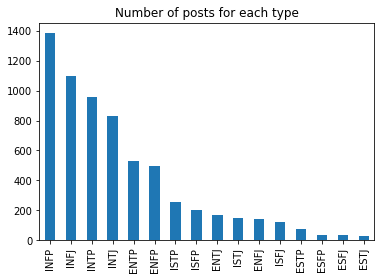

In [3]:
mbti['type'].value_counts().plot(kind = 'bar', title='Number of posts for each type')


In [4]:
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

In [5]:
print(f"before:  {mbti.shape} \nafter: {all_mbti.shape}")

before:  (6506, 2) 
after: (316548, 2)


In [6]:
mbti_type = pd.concat([mbti['type'].value_counts().to_frame(name='before'), all_mbti['type'].value_counts().to_frame(name='after')],axis=1)
mbti_type

before  after
ENFJ     143   6947
ENFP     496  23925
ENTJ     167   8174
ENTP     530  26017
ESFJ      35   1668
ESFP      36   1663
ESTJ      30   1495
ESTP      71   3437
INFJ    1100  53807
INFP    1386  67846
INTJ     830  39776
INTP     960  46637
ISFJ     124   6051
ISFP     198   9521
ISTJ     145   7018
ISTP     255  12566

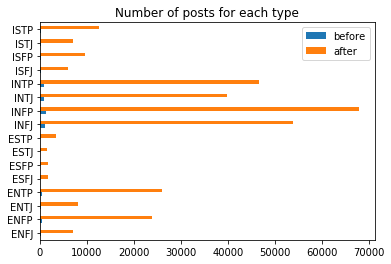

In [8]:
mbti_type.plot(kind='barh', title='Number of posts for each type')

In [9]:
def split_type(row):
    ''' 
       Split MBTI type into individual features for Binary Classification
       eg ENFP = [0 1 0 0]
    '''
    t = row['type']
    I,N,T,J = 0,0,0,0
    
    I = 1 if t[0] =='I' else 0
    
    N = 1 if t[1] == 'N' else 0
    
    T = 1 if t[2] == 'T' else 0
    
    J = 1 if t[3] == 'J' else 0
    
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [10]:
all_mbti = all_mbti.join(all_mbti.apply(lambda row: split_type(row), axis=1))
all_mbti.head(5)

type                                               post  IE  JP  NS  TF
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw   1   1   1   0
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...   1   1   1   0
2  INFJ  enfp and intj moments  https://www.youtube.com...   1   1   1   0
3  INFJ  What has been the most life-changing experienc...   1   1   1   0
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...   1   1   1   0

In [11]:
# rearrange columns
all_mbti = all_mbti[['type', 'IE', 'NS', 'TF', 'JP', 'post']]
all_mbti.head(5)

type  IE  NS  TF  JP                                               post
0  INFJ   1   1   0   1        'http://www.youtube.com/watch?v=qsXHcwe3krw
1  INFJ   1   1   0   1  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2  INFJ   1   1   0   1  enfp and intj moments  https://www.youtube.com...
3  INFJ   1   1   0   1  What has been the most life-changing experienc...
4  INFJ   1   1   0   1  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...

In [25]:
all_mbti.to_csv('data/all_mbti_split.csv')

In [12]:
print ("Introversion (I) -     Extroversion (E):\t")
print("\t", all_mbti['IE'].value_counts()[0], "  -     ", all_mbti['IE'].value_counts()[1])
print ("Intuition (N)    -     Sensing (S):\t\t")
print("\t", all_mbti['NS'].value_counts()[0], "  -     ", all_mbti['NS'].value_counts()[1])
print ("Thinking (T)     -     Feeling (F):\t\t")
print("\t", all_mbti['TF'].value_counts()[0], " -      ", all_mbti['TF'].value_counts()[1])
print ("Judging (J)      -     Perceiving (P):\t\t")
print("\t", all_mbti['JP'].value_counts()[0], " -      ", all_mbti['JP'].value_counts()[1])

Introversion (I) -     Extroversion (E):	
	 73326   -      243222
Intuition (N)    -     Sensing (S):		
	 43419   -      273129
Thinking (T)     -     Feeling (F):		
	 171428  -       145120
Judging (J)      -     Perceiving (P):		
	 191612  -       124936


## Natural Language Processing

In [3]:
# create structured data from unstructured text

## Build classification models

In [4]:
# which algorithms will you use?

In [26]:
vect = TfidfVectorizer(binary=True, min_df=3, ngram_range=(1,2), stop_words='english')

In [27]:
X = vect.fit_transform(all_mbti['post'])

In [29]:
y = all_mbti['IE']

In [30]:
n = 5000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), y[:n])

In [31]:
forest = RandomForestClassifier(n_estimators=50, random_state=2, class_weight="balanced")



In [32]:
forest.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [33]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.822
Accuracy on test set: 0.993


In [34]:
y_pred = forest.predict(X_test)
confusion_matrix(y_pred, y_test)

array([[137,   1],
       [  4, 608]])

In [35]:
print(classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       138
          1       1.00      0.99      1.00       612

avg / total       0.99      0.99      0.99       750



## Model validation and evaluation

In [5]:
# make sure your models are robust, and pick the best one

## Import test data

In [6]:
# pd.read_csv...

## Predict test data labels from winning model

In [8]:
# .predict
# export as CSV in prescribed format

## List how you've gone above and beyond the minimum

List:

* additional pre-processing you've done or NLP techniques you've applied
* classification algorithms you've applied, beyond those covered in this sprint (logistic regression, KNN, LDA, QDA, SVM)
* model validation you're performed
* any other creative problem-solving you've done

decision trees often perform well on imbalanced datasets. 
The splitting rules that look at the class variable used in the creation of the trees, 
can force both classes to be addressed.